train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.795, 0.7974
train acc, test acc | 0.8796333333333334, 0.8836
train acc, test acc | 0.89905, 0.9023
train acc, test acc | 0.90825, 0.912
train acc, test acc | 0.9133666666666667, 0.9152
train acc, test acc | 0.9192333333333333, 0.9225
train acc, test acc | 0.9234833333333333, 0.9266
train acc, test acc | 0.9274166666666667, 0.9294
train acc, test acc | 0.93055, 0.9342
train acc, test acc | 0.9338833333333333, 0.9346
train acc, test acc | 0.9368833333333333, 0.9362
train acc, test acc | 0.93875, 0.9394
train acc, test acc | 0.9409666666666666, 0.9414
train acc, test acc | 0.94245, 0.9428
train acc, test acc | 0.9450666666666667, 0.9442
train acc, test acc | 0.9462666666666667, 0.9465


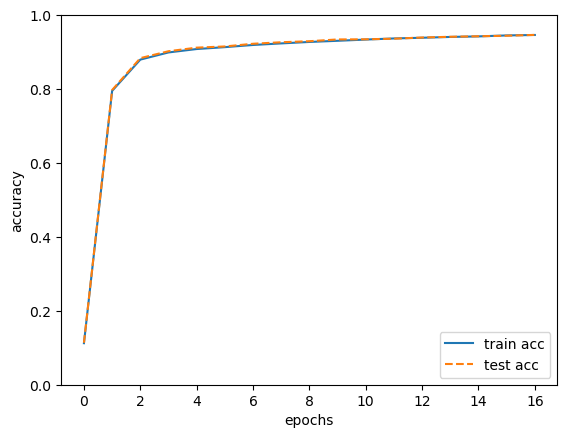

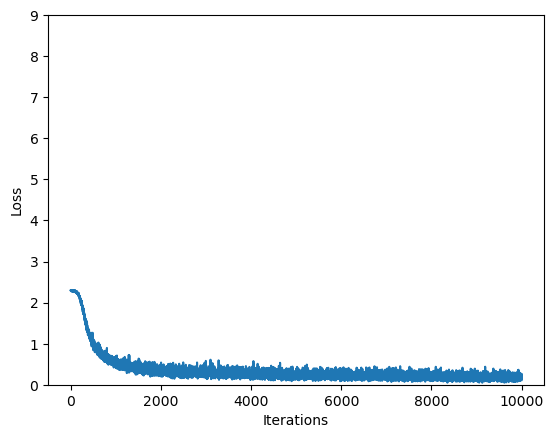

In [2]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from layer.two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')  
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 손실 함수 값의 추이 그래프
plt.plot(train_loss_list)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.ylim(0,9)
plt.show()